In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

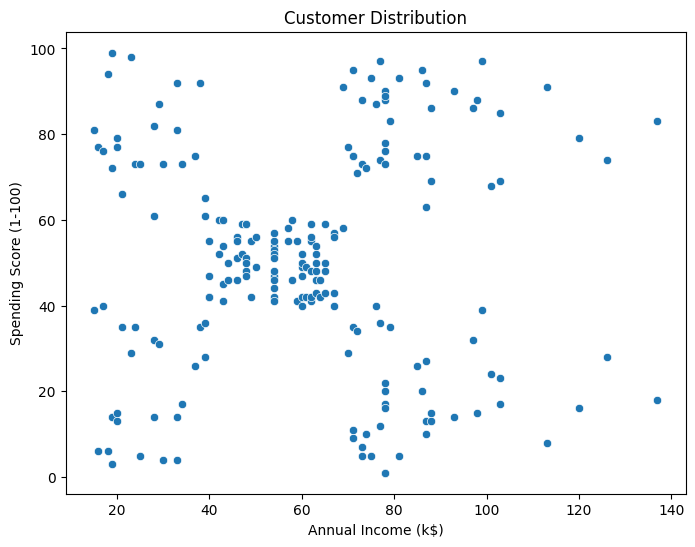

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Customer Distribution")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

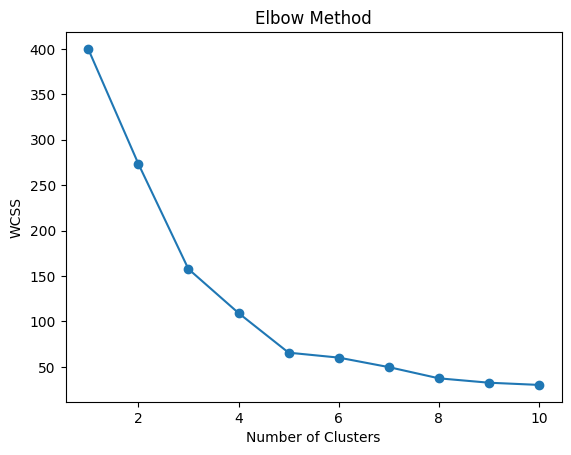

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
# Choose optimal clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

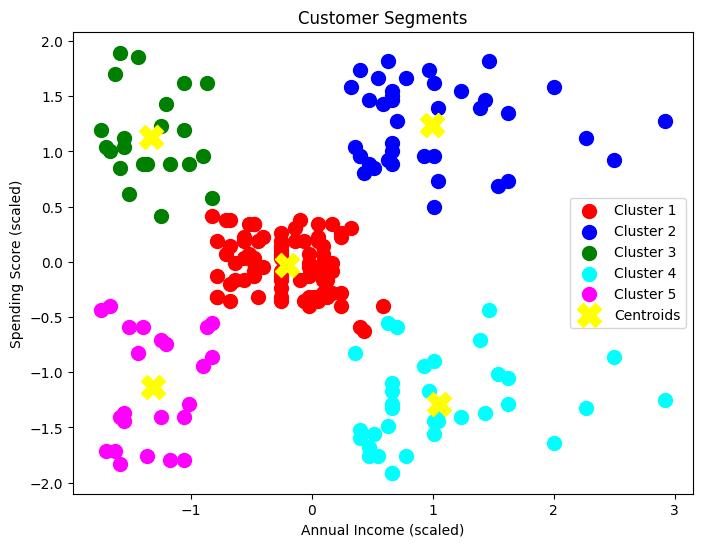

In [9]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')
plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

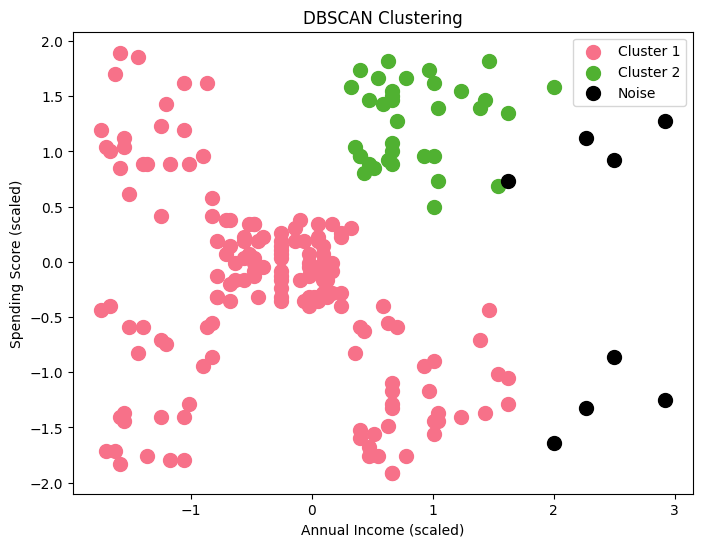

Silhouette Score: 0.35044619989666004


In [10]:
#bonus challenge
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
unique_labels = set(db_labels)
colors = sns.color_palette("husl", len(unique_labels))

for label in unique_labels:
    if label == -1:
        # Noise
        color = 'black'
        label_name = 'Noise'
    else:
        color = colors[label]
        label_name = f'Cluster {label+1}'
    plt.scatter(X_scaled[db_labels == label, 0], X_scaled[db_labels == label, 1],
                s=100, c=[color], label=label_name)

plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

# Evaluate clustering
print("Silhouette Score:", silhouette_score(X_scaled, db_labels))

   Cluster  Spending Score (1-100)
0        0               49.518519
1        1               82.128205
2        2               79.363636
3        3               17.114286
4        4               20.913043


C:\Users\User\AppData\Local\Temp\ipykernel_15260\3142775189.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Spending Score (1-100)', data=avg_spending, palette='viridis')


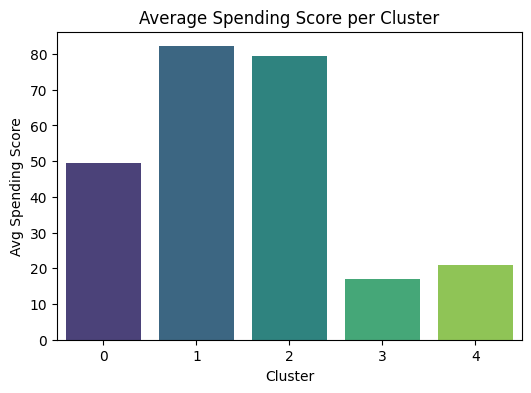

In [11]:
#bonus task 2
# Add cluster labels to original DataFrame
df['Cluster'] = y_kmeans

# Calculate average spending score per cluster
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean().reset_index()
print(avg_spending)

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x='Cluster', y='Spending Score (1-100)', data=avg_spending, palette='viridis')
plt.title("Average Spending Score per Cluster")
plt.ylabel("Avg Spending Score")
plt.xlabel("Cluster")
plt.show()